- Table of contents:
    1. Image Processing
    2. Model Creation & Training
    3. Model Evaluation
---------------------
# 1. Image Processing:
    

In [1]:
# Importing neccessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split

# Ignore the warning
import warnings
warnings.filterwarnings('ignore')
#------------------------------------------
#from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
train_path = os.path.join('..','input','intel-image-classification','seg_train','seg_train')
test_path = os.path.join('..','input','intel-image-classification','seg_test','seg_test')

train_data = image_dataset_from_directory(train_path,image_size=(150,150),
                                          label_mode='categorical',
                                          batch_size=64)
test_data = image_dataset_from_directory(test_path,image_size=(150,150),
                                          label_mode='categorical',
                                          batch_size=64)

Found 14034 files belonging to 6 classes.


2022-09-03 07:56:26.143630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 07:56:26.284098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 07:56:26.284931: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 07:56:26.291674: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 3000 files belonging to 6 classes.


In [3]:
print('Data Class Indicies:', test_data.class_names)

Data Class Indicies: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


2022-09-03 07:56:29.865857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


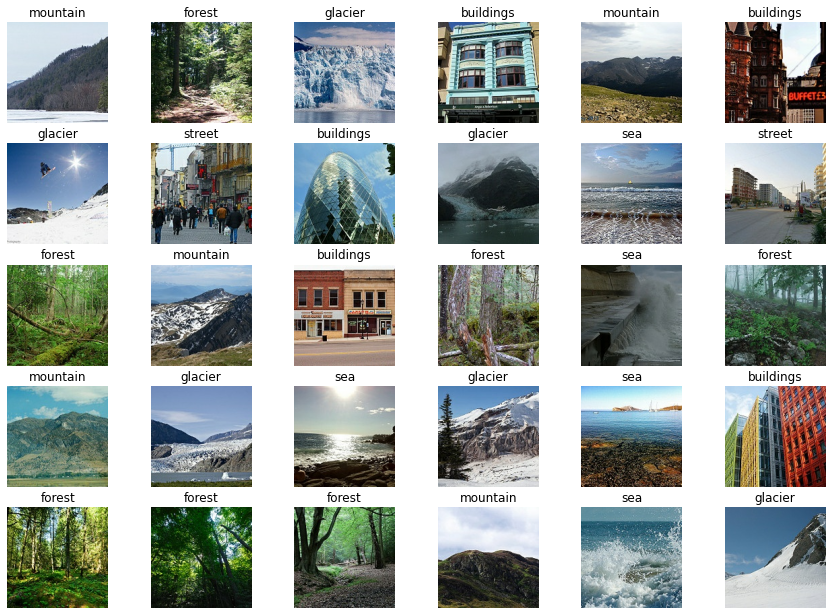

In [4]:
plt.figure(figsize=(15, 13))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(30):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

# 2. Model Creation & Training

In [5]:
early_stopping_monitor = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5)

best_model = ModelCheckpoint('bestmodel.hdf5', monitor='val_accuracy', save_best_only=True)

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    Conv2D(32, (3,3), activation='relu'),  
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),    
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 70, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 32)        9

In [8]:
model.fit(train_data, validation_data= test_data, epochs=30, 
         callbacks=[best_model, reduce_lr_on_plateau, early_stopping_monitor])

Epoch 1/30


2022-09-03 07:56:35.410309: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


220/220 [==============================] - 57s 223ms/step - loss: 1.3734 - accuracy: 0.4658 - val_loss: 0.9484 - val_accuracy: 0.6443
Epoch 2/30
220/220 [==============================] - 15s 67ms/step - loss: 0.9239 - accuracy: 0.6364 - val_loss: 0.7707 - val_accuracy: 0.7123
Epoch 3/30
220/220 [==============================] - 14s 64ms/step - loss: 0.7697 - accuracy: 0.7220 - val_loss: 0.6258 - val_accuracy: 0.7680
Epoch 4/30
220/220 [==============================] - 14s 61ms/step - loss: 0.6700 - accuracy: 0.7591 - val_loss: 0.6053 - val_accuracy: 0.7783
Epoch 5/30
220/220 [==============================] - 15s 66ms/step - loss: 0.6183 - accuracy: 0.7773 - val_loss: 0.5897 - val_accuracy: 0.8067
Epoch 6/30
220/220 [==============================] - 14s 61ms/step - loss: 0.5555 - accuracy: 0.8024 - val_loss: 0.5706 - val_accuracy: 0.8093
Epoch 7/30
220/220 [==============================] - 15s 64ms/step - loss: 0.5209 - accuracy: 0.8120 - val_loss: 0.5503 - val_accuracy: 0.8020
Ep

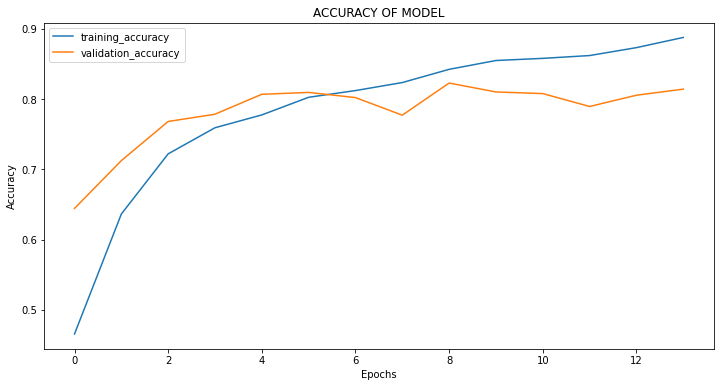

In [9]:
# accuracy of our model
plt.figure(figsize=(12, 6))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY OF MODEL")
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

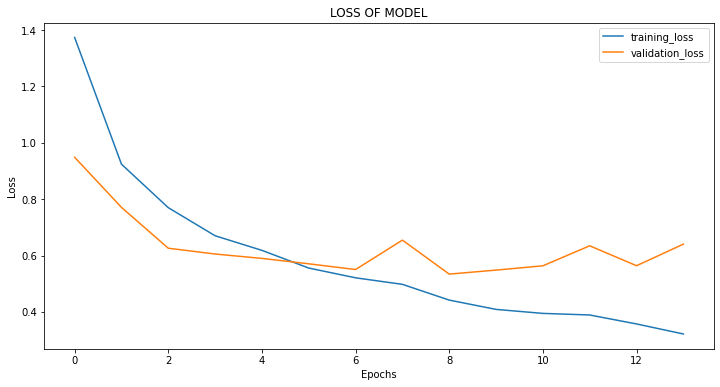

In [10]:
# loss of our model
plt.figure(figsize=(12, 6))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS OF MODEL")
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [11]:
model.load_weights('bestmodel.hdf5')
model.evaluate(test_data);

47/47 [==============================] - 2s 38ms/step - loss: 0.5341 - accuracy: 0.8227


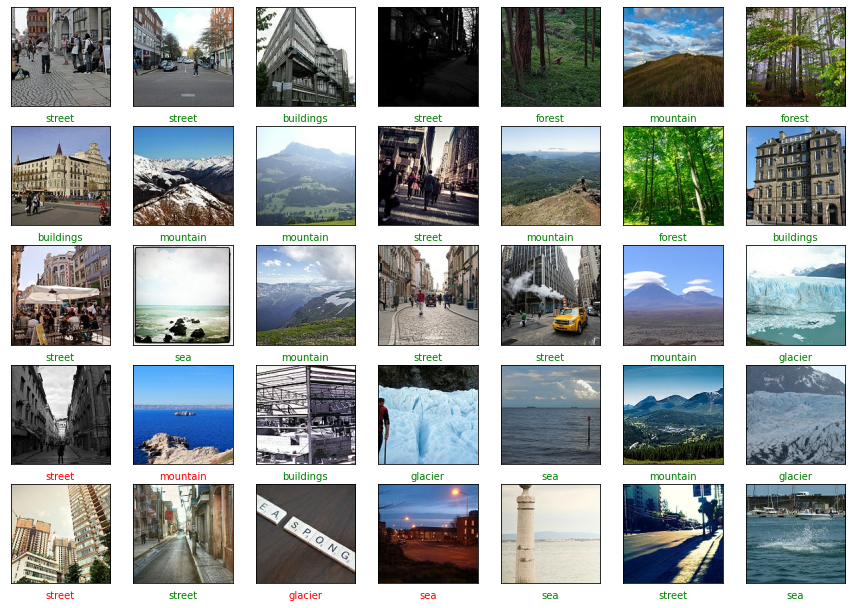

In [12]:
#Visualize 30 of the predicted data with green label for correct predictions
#and red label vise versa.
plt.figure(figsize=(15,15))
for images, labels in test_data.take(2):
    for i in range(35):
        prediction = model.predict(images[i].numpy().reshape(1,150,150,3))
        plt.subplot(7, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.grid(False)
        xlabel = plt.xlabel(class_names[prediction.argmax()])
        if (prediction.argmax() == labels[i].numpy().argmax()):
            xlabel.set_color("green")
        else:
            xlabel.set_color("red")
plt.show()

### - The model did good, but it's not the best, thus using transfer learning would yeild better results, but afterall it was quite an adventure!